# Homework 2

**Omar I. Godinez**

**Due Monday, September 21 by the start of class**. Submit via email. In addition to code, many questions ask for additional explanations. You may answer these with comments in code blocks, or in separate Markdown blocks.

Some helpful setup code. Feel free to add whatever else you might need.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

from sklearn.datasets import fetch_california_housing, load_breast_cancer

# For reproducibility
np.random.seed(42)

## Part 1: Predicting House Prices

The `sklearn.datasets.fetch_california_housing` dataset contains information on houses in California. Let's train a model to predict house prices!

More info on the data can be found [here](http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html).

**1.1** Fetch the dataset and take a look at it (read the description, make a dataframe and run `describe()`, etc.). Notice that this version is already a little cleaned up compared to the version used in our textbook. 

**Briefly describe the differences between our version here and the on in the textbook.**

In [2]:
# 1.1 code here -- load and examine the data
CA_dataset = fetch_california_housing()
features = CA_dataset.feature_names
data = CA_dataset.data
targets = CA_dataset.target

print(CA_dataset.DESCR)
target = pd.DataFrame(targets, columns=['Target'])
df = pd.DataFrame(data, columns=features)
df.head()

#This version replaced the total rooms and bedrooms for avarages, 
#it added the median income in block and average number of household members

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


**Answer 1.1 here**

**1.2** Visualize the univariate distribution (as a histogram) of each feature, and the distribution of the target. Do you notice anything? Is something that you think might require special treatment (just comment what it is; you’re not required to try to fix it).

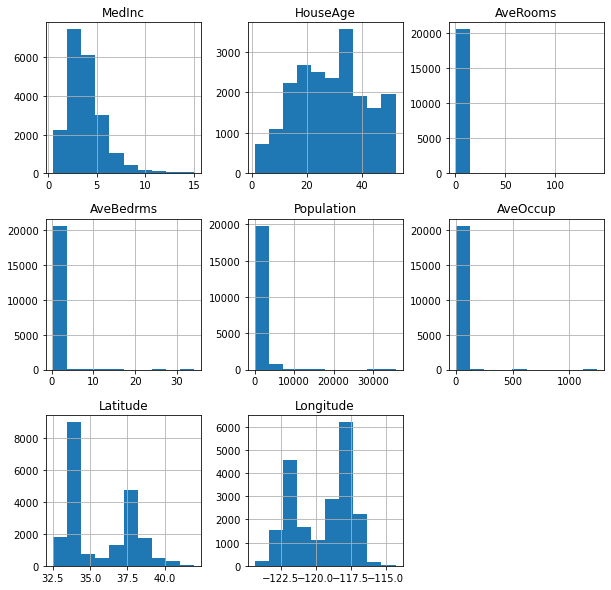

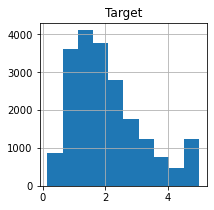

In [3]:
# 1.2 Code here
df.hist(figsize=(10, 10))
target.hist(figsize=(3, 3)) ;
#We don't have any nice distribution, and many of them are right-skewed.

**1.3** Visualize the dependency of the target on each feature (2d scatter plot).

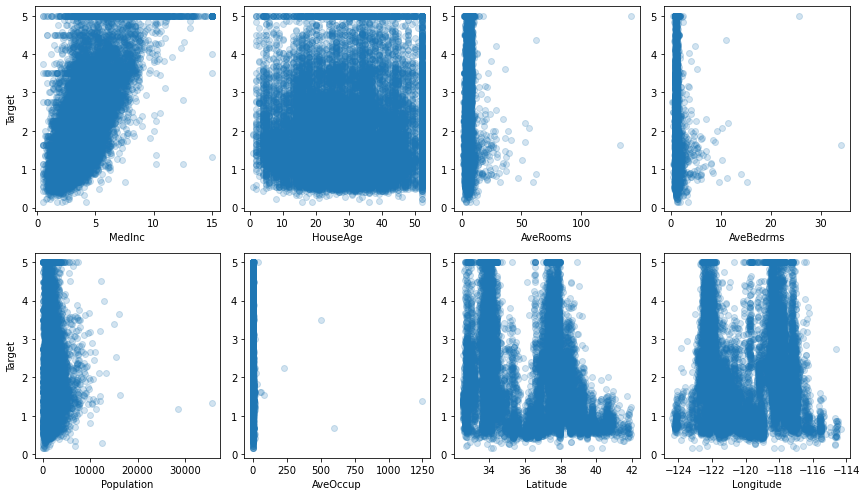

In [4]:
# 1.3 Code here
fig, axs = plt.subplots(2, 4)
fig.set_size_inches(12, 7)

c = 0
axs[0][0].set_ylabel("Target")

for i in range(2):
    axs[i][0].set_ylabel("Target")
    for j in range(4):                                                                   
        axs[i][j].scatter(data.T[c], target, marker='o', alpha=.2)
        axs[i][j].set_xlabel(features[c])
        c += 1

plt.tight_layout()

**1.4** Split data into training and test set.

In [5]:
from sklearn.model_selection import train_test_split

# 1.4 Code here
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)
print("train length: " + str(len(x_train)) + " test length: " + str(len(x_test)))

train length: 16512 test length: 4128


**1.5** Evaluate Linear Regression, Ridge, Lasso and ElasticNet using cross-validation with the default hyperparameters (use `cross_val_score`). Note that the "score" for these models is $R^2$, AKA the coefficient of determination. Do not preprocess the data in any way. Print out the results.

In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score

# 1.5 Code here
linear_reg = LinearRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()
elastic_net = ElasticNet()

print("linear model score: " + str(np.mean(cross_val_score(linear_reg, x_train, y_train, cv=10)).round(3)))
print("ridge model score: " + str(np.mean(cross_val_score(ridge_reg, x_train, y_train, cv=10)).round(3)))
print("lasso model score: " + str(np.mean(cross_val_score(lasso_reg, x_train, y_train, cv=10)).round(3)))
print("elastic net model score: " + str(np.mean(cross_val_score(elastic_net, x_train, y_train, cv=10)).round(3)))

linear model score: 0.611
ridge model score: 0.611
lasso model score: 0.29
elastic net model score: 0.427


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

# 1.6 Code here
pipe1 = make_pipeline(StandardScaler(), LinearRegression())
pipe2 = make_pipeline(StandardScaler(), Ridge())
pipe3 = make_pipeline(StandardScaler(), Lasso())
pipe4 = make_pipeline(StandardScaler(), ElasticNet())

print("linear model score: " + str(np.mean(cross_val_score(pipe1, x_train, y_train, cv=10)).round(3)))
print("ridge model score: " + str(np.mean(cross_val_score(pipe2, x_train, y_train, cv=10)).round(3)))
print("lasso model score: " + str(np.mean(cross_val_score(pipe3, x_train, y_train, cv=10)).round(3)))
print("elastic net model score: " + str(np.mean(cross_val_score(pipe4, x_train, y_train, cv=10)).round(3)))


linear model score: 0.611
ridge model score: 0.611
lasso model score: -0.001
elastic net model score: 0.208


**1.7** Now let's tune the hyperparameters of the models using GridSearchCV. For right now don't worry too much about what the hyperparameters actually mean.

- `LinearRegression` does not have any hyperparameters...so you don't need any grid search at all.
- For `Ridge` and `Lasso`, try out some $\alpha$ (`alpha`) values, and **plot $\alpha$ (x-axis) against $R^2$ (y-axis)**.
- For `ElasticNet`, try out various $\alpha$ values AND L1 ratios (`l1_ratio`) (at the same time). **Create a heatmap (use `imshow` from `matplotlib`) showing how $R^2$ changes with these values.**

Use 5-fold cross validation. I suggest pass `n_jobs=-1` to `GridSearchCV` to run things in parallel (i.e., speed it up). 

**For all models, print out the best $R^2$ you found. Did the results improve?**

ridge best model and score: {'ridge__alpha': 0.001} 0.611
lasso best model and score: {'lasso__alpha': 0.001} 0.611
elactic net best model and score: {'elasticnet__alpha': 0.001, 'elasticnet__l1_ratio': 1} 0.611


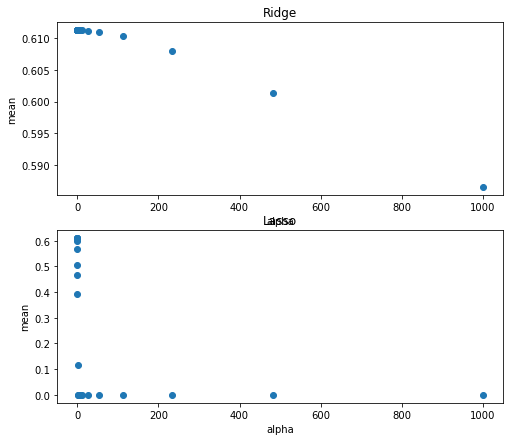

In [8]:
from sklearn.model_selection import GridSearchCV

# Here are some example hyperparameters to try. You are free to come up with your own values.
# You'll have to figure out how to apply these to GridSearchCV.
ridge_alpha_vals = np.logspace(-3, 3, 20)
lasso_alpha_vals = np.logspace(-3, 3, 20)
elastic_l1_ratio_vals = [0.01, .1, .5, .9, .98, 1]
elastic_alpha_vals = np.logspace(-3, 3, 20)

# 1.7 Code here
param_grid_ridge = {'ridge__alpha': np.logspace(-3, 3, 20)}
param_grid_lasso = {'lasso__alpha': np.logspace(-3, 3, 20)}
param_grid_elastic = {'elasticnet__l1_ratio': [0.01, .1, .5, .9, .98, 1], 'elasticnet__alpha': np.logspace(-3, 3, 20)}

grid2 = GridSearchCV(pipe2, param_grid_ridge, cv=10, n_jobs=-1)
grid2.fit(x_train, y_train)
print("ridge best model and score: " + str(grid2.best_params_) + " " + str(grid2.best_score_.round(3)))

grid3 = GridSearchCV(pipe3, param_grid_lasso, cv=10, n_jobs=-1)
grid3.fit(x_train, y_train)
print("lasso best model and score: " + str(grid3.best_params_) + " " + str(grid3.best_score_.round(3)))

grid4 = GridSearchCV(pipe4, param_grid_elastic, cv=10, n_jobs=-1)
grid4.fit(x_train, y_train)
print("elactic net best model and score: " + str(grid4.best_params_) + " " + str(grid4.best_score_.round(3)))

fig, axs = plt.subplots(2, 1)
fig.set_size_inches(8, 7)
axs[0].set_ylabel("mean")                                                               
axs[0].scatter(grid2.cv_results_['param_ridge__alpha'].data, grid2.cv_results_['mean_test_score'])
axs[0].set_xlabel("alpha")
axs[0].set_title("Ridge")
axs[1].set_ylabel("mean")                                                               
axs[1].scatter(grid3.cv_results_['param_lasso__alpha'].data, grid3.cv_results_['mean_test_score'])
axs[1].set_xlabel("alpha")
axs[1].set_title("Lasso");

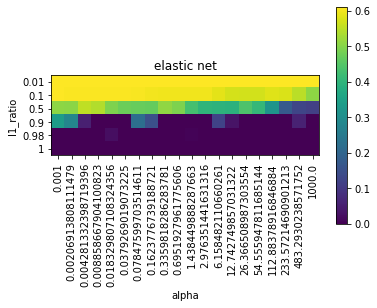

In [9]:
scores = grid4.cv_results_['mean_test_score'].reshape(len(elastic_l1_ratio_vals),len(elastic_alpha_vals))
plt.imshow(scores)
plt.yticks(np.arange(len(elastic_l1_ratio_vals)), elastic_l1_ratio_vals)
plt.xticks(np.arange(len(elastic_alpha_vals)), elastic_alpha_vals, rotation = 90)
plt.title('elastic net')
plt.xlabel('alpha')
plt.ylabel('l1_ratio')
plt.colorbar();
fig.tight_layout()

**1.8** Visualize (perhaps with a bar chart) the coefficients of the resulting models (the best ones you found using `GridSearchCV`). Do they agree on which features are important?

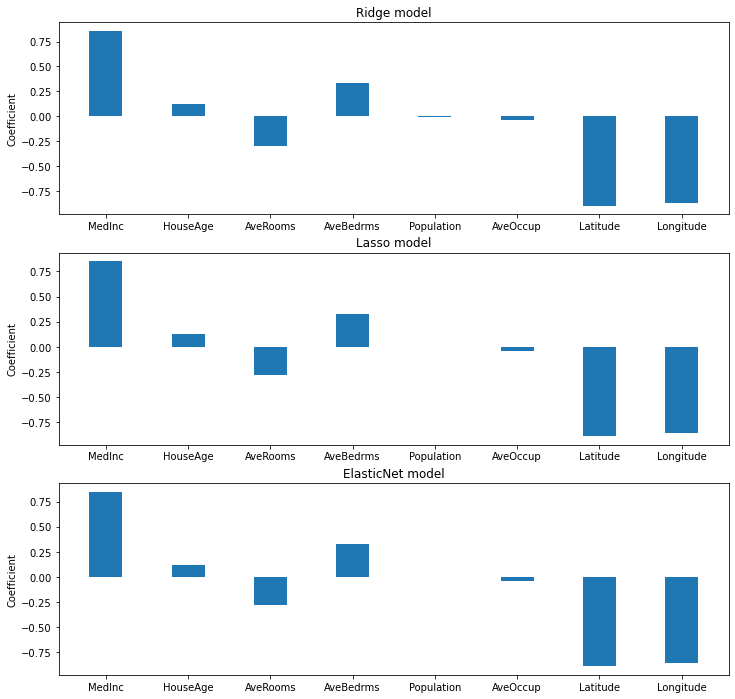

In [11]:
# 1.8 code here
#It is impresive that they all have the same values
fig, axs = plt.subplots(3, 1)
fig.set_size_inches(12, 12)

axs[0].bar(features, grid2.best_estimator_[-1].coef_[0], width = 0.4)
axs[0].set_ylabel("Coefficient")
axs[0].set_title("Ridge model")

axs[1].bar(features, grid3.best_estimator_[-1].coef_,  width = 0.4)
axs[1].set_ylabel("Coefficient")
axs[1].set_title("Lasso model")

axs[2].bar(features, grid4.best_estimator_[-1].coef_, width = 0.4)
axs[2].set_ylabel("Coefficient")
axs[2].set_title("ElasticNet model")
plt.show()


**1.9** Finally, take your best model with best hyperparameters, retrain it on the whole training set (this might already be done, depending on how you called `GridSearchCV`), and evaluate it on the test set. Show your results.

In [12]:
# 1.9 code here
pipe2 = make_pipeline(StandardScaler(), Ridge(alpha = 1.438449888287663))
pipe3 = make_pipeline(StandardScaler(), Lasso(alpha = 0.001))
pipe4 = make_pipeline(StandardScaler(), ElasticNet(alpha = 0.001, l1_ratio = 1))

print("Best ridge model score: " + str(np.mean(cross_val_score(pipe2, x_test, y_test, cv=10)).round(3)))
print("Best lasso model score: " + str(np.mean(cross_val_score(pipe3, x_test, y_test, cv=10)).round(3)))
print("Best elastic net model score: " + str(np.mean(cross_val_score(pipe4, x_test, y_test, cv=10)).round(3)))

Best ridge model score: 0.563
Best lasso model score: 0.564
Best elastic net model score: 0.564


## Part 2: Predicting Breast Cancer

Dataset: sklearn.datasets.load_breast_cancer

In [2]:
# load the data, explore, etc.
C_dataset = load_breast_cancer()
features = C_dataset.feature_names
data = C_dataset.data
targets = C_dataset.target

print(C_dataset.DESCR)
target = pd.DataFrame(targets, columns=['Target'])
df = pd.DataFrame(data, columns=features)
df.head()

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**2.1** Visualize the univariate distribution of each feature, and the distribution of the target.

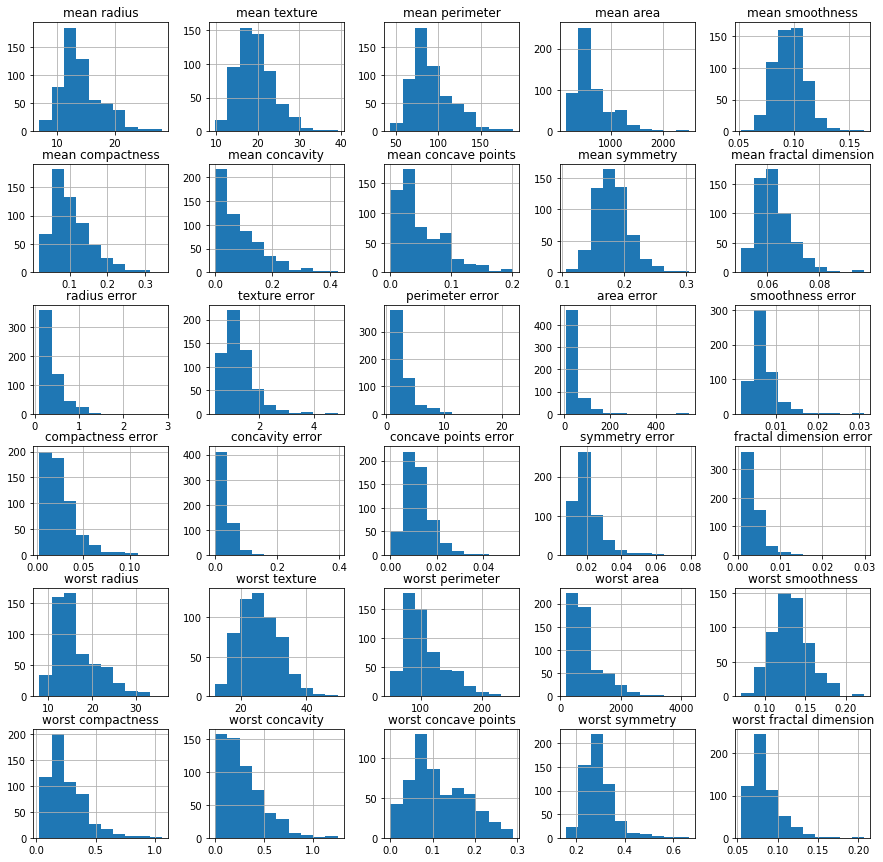

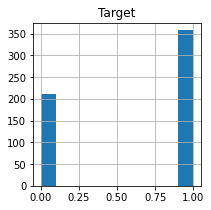

In [3]:
# 2.1 code here
df.hist(figsize=(15, 15))
target.hist(figsize=(3, 3));

**2.2** Split data into training and test set. 

In [5]:
# 2.2 code here
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.values, target.values, test_size=0.2, random_state=42)
print("train length: " + str(len(x_train)) + " test length: " + str(len(x_test)))

train length: 455 test length: 114


**2.3** Evaluate Logistic Regression (`LogisticRegression`), linear support vector machines (`LinearSVC`) and nearest centroids (`NearestCentroid`) using cross-validation with the default hyperparameters (use `cross_val_score`). 

Do not preprocess the data in any way.

a. Print out the results (i.e., accuracy for each).

b. Look up the two hyperparameters I specified below (`solver='liblinear'` for `LogisticRegression`) and `dual=False` for `LinearSVC`). These both have to do with how the models' parameters are learned. Why do you think I chose the values I did, over the alternatives?

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestCentroid

logreg = LogisticRegression(solver='liblinear')
svm = LinearSVC(dual=False)
nc = NearestCentroid()
models = [logreg, svm, nc]

# 2.3 code here
# I think we are using liblinear because we have a small dataset (569 samples.)
# and we change the dual propertie of SVC to be false because we have more samples than features.

print("logreg model score: " + str(np.mean(cross_val_score(logreg, x_train, y_train.flatten(), cv=10)).round(3)))
print("CVM model score: " + str(np.mean(cross_val_score(svm, x_train, y_train.flatten(), cv=10)).round(3)))
print("NC model score: " + str(np.mean(cross_val_score(nc, x_train, y_train.flatten(), cv=10)).round(3)));

logreg model score: 0.954
CVM model score: 0.96
NC model score: 0.881


**2.4** Same thing, but now scale the data first. Does it help?

In [17]:
# 2.4 code here

#It helps.
pipe1 = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear'))
pipe2 = make_pipeline(StandardScaler(), LinearSVC(dual=False))
pipe3 = make_pipeline(StandardScaler(), NearestCentroid())


print("logreg model score: " + str(np.mean(cross_val_score(pipe1, x_train, y_train.flatten(), cv=10)).round(3)))
print("CVM model score: " + str(np.mean(cross_val_score(pipe2, x_train, y_train.flatten(), cv=10)).round(3)))
print("NC model score: " + str(np.mean(cross_val_score(pipe3, x_train, y_train.flatten(), cv=10)).round(3)))

logreg model score: 0.976
CVM model score: 0.969
NC model score: 0.925


**2.5** Now let's tune the hyperparameters of the models using GridSearchCV. Use the following models:

- `LogisticRegression`:
    - look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and find and explore at least one hyperparameter.
- `LinearSVC`:
    - `C` can be adjusted; it must be a positive float.
- `NearestCentroid`:
    - explore the `shrink_threshold` hyperparameter.

As above, visualize the performance as a function of the hyperparameters for all three models. If you only used one hyperparameter, your visualizations can just be simple plots (scatter or line). If you used two hyperparameters, use a heatmap. If you used more...well, don't, at least for now.

For all models, print out the accuracy you found. Did the results improve? Save the best model for use in question 2.6.

In [18]:
from sklearn.model_selection import GridSearchCV
#logreg = LogisticRegression(solver='liblinear')
#svm = LinearSVC(dual=False)
#nc = NearestCentroid()
# 2.5 code here
param_grid_lg = {'logisticregression__C': np.logspace(-3, 3, 20), 'logisticregression__random_state': np.arange(0, 20, 2, dtype=int)}
param_grid_svc = {'linearsvc__C': np.logspace(0, 5, 20), 'linearsvc__penalty':['l1', 'l2']} 
param_grid_nc = {'nearestcentroid__shrink_threshold': np.logspace(0, 5, 20)}

grid1 = GridSearchCV(pipe1, param_grid_lg, cv=10, n_jobs=-1)
grid1.fit(x_train, y_train.flatten())
print("logreg best model and score: " + str(grid1.best_params_) + " " + str(grid1.best_score_.round(3)))

grid2 = GridSearchCV(pipe2, param_grid_svc, cv=10, n_jobs=-1)
grid2.fit(x_train, y_train.flatten())
print("SVC best model and score: " + str(grid2.best_params_) + " " + str(grid2.best_score_.round(3)))

grid3 = GridSearchCV(pipe3, param_grid_nc, cv=10, n_jobs=-1)
grid3.fit(x_train, y_train.flatten())
print("NearestCentroid best model and score: " + str(grid3.best_params_) + " " + str(grid3.best_score_.round(3)))

logreg best model and score: {'logisticregression__C': 0.07847599703514611, 'logisticregression__random_state': 0} 0.98
SVC best model and score: {'linearsvc__C': 1.0, 'linearsvc__penalty': 'l1'} 0.974
NearestCentroid best model and score: {'nearestcentroid__shrink_threshold': 3.3598182862837818} 0.939


**2.6** By default, `GridSearchCV` will notice you are doing classification and use `StratifiedKFold`. Change this to plain `KFold`. Do the parameters that are found change?

In [19]:
# 2.6 Code here
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

models = [ ('logisticregression', LogisticRegression(solver='liblinear')),
           ('linearsvc', LinearSVC(dual=False)),
           ('nearestcentroid', NearestCentroid()) ]
results =[]
names = []
for name, model in models:
    #kfold = KFold(n_splits=4, shuffle=True, random_state=8)
    kfold = KFold(n_splits=10)
    cv = cross_validate(model, x_train, y_train.flatten(), cv=kfold ,scoring='r2', return_estimator=True) 
    #results.append(cv)
    names.append(name)
    print(f'{name} model score : {np.mean(cv["test_score"]).round(3)}')

logisticregression model score : 0.784
linearsvc model score : 0.784
nearestcentroid model score : 0.466


**2.7** Accuracy is not a great metric for classification. Run your grid search again (with `StratifiedKFold`) with `'f1'` as the metric. Compare the best model with the model found in 2.4, comparing both accuracy and f1_score.

In [20]:
# 2.7 code here
param_grid_lg = {'logisticregression__C': np.logspace(-3, 3, 20), 'logisticregression__random_state': np.arange(0, 20, 2, dtype=int)}
param_grid_svc = {'linearsvc__C': np.logspace(0, 5, 20), 'linearsvc__penalty':['l1', 'l2']} 
param_grid_nc = {'nearestcentroid__shrink_threshold': np.logspace(0, 5, 20)}

grid1 = GridSearchCV(pipe1, param_grid_lg, cv=10, n_jobs=-1, scoring='f1')
grid1.fit(x_train, y_train.flatten())
print("logreg best model and score: " + str(grid1.best_params_) + " " + str(grid1.best_score_.round(3)))

grid2 = GridSearchCV(pipe2, param_grid_svc, cv=10, n_jobs=-1, scoring='f1')
grid2.fit(x_train, y_train.flatten())
print("SVC best model and score: " + str(grid2.best_params_) + " " + str(grid2.best_score_.round(3)))

grid3 = GridSearchCV(pipe3, param_grid_nc, cv=10, n_jobs=-1, scoring='f1')
grid3.fit(x_train, y_train.flatten())
print("NearestCentroid best model and score: " + str(grid3.best_params_) + " " + str(grid3.best_score_.round(3)))

logreg best model and score: {'logisticregression__C': 0.07847599703514611, 'logisticregression__random_state': 0} 0.984
SVC best model and score: {'linearsvc__C': 3.3598182862837818, 'linearsvc__penalty': 'l2'} 0.979
NearestCentroid best model and score: {'nearestcentroid__shrink_threshold': 3.3598182862837818} 0.952


**2.8** Visualize the coefficients for LogisticRegression and Linear Support Vector Machines.

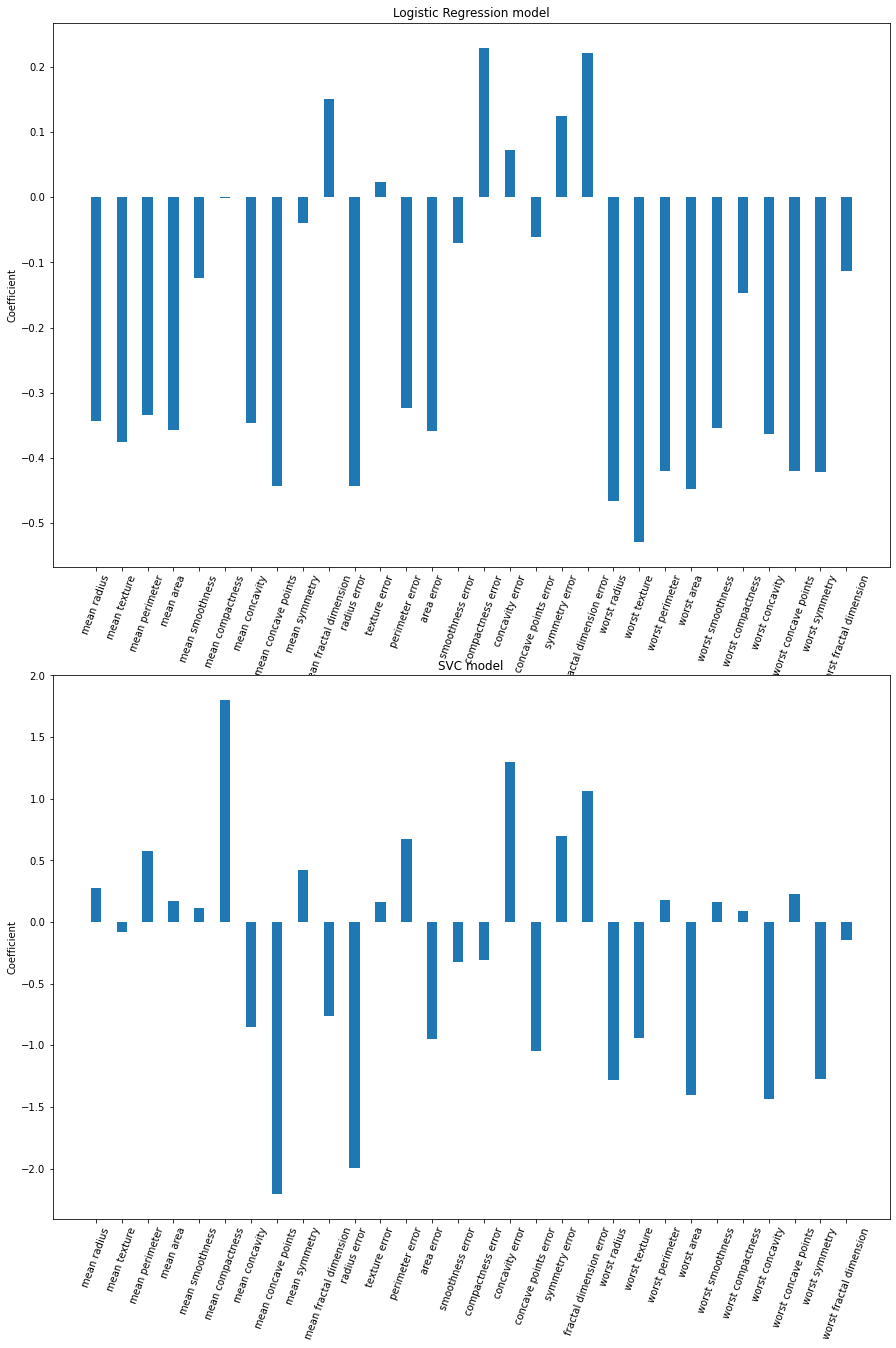

In [21]:
# 2.8 code here
model1 = LogisticRegression(solver='liblinear', C=0.07847599703514611, random_state=0).fit(x_train, y_train.flatten())
model2 = LinearSVC(dual=False, C=3.3598182862837818, penalty='l2').fit(x_train, y_train.flatten())

fig, axs = plt.subplots(2, 1)
fig.set_size_inches(15, 22)
grid2.best_estimator_[1].coef_[0]
axs[0].bar(features, grid1.best_estimator_[-1].coef_[0], width = 0.4)
axs[0].set_ylabel("Coefficient")
axs[0].set_title("Logistic Regression model")
axs[0].tick_params(axis='x', labelrotation = 70)

axs[1].bar(features, grid2.best_estimator_[-1].coef_[0],  width = 0.4)
axs[1].set_ylabel("Coefficient")
axs[1].set_title("SVC model")
axs[1].tick_params(axis='x', labelrotation = 70)

**2.9** Finally, take your best model with best hyperparameters, retrain it on the whole training set (this might already be done, depending on how you called `GridSearchCV`), and evaluate it on the test set. Show your results.

In [22]:
# 2.9 code here
pipe1 = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear', C=0.07847599703514611, random_state=0))
pipe2 = make_pipeline(StandardScaler(), LinearSVC(dual=False, C=3.3598182862837818, penalty='l2'))
pipe3 = make_pipeline(StandardScaler(), NearestCentroid(shrink_threshold=3.3598182862837818))


print("Best logreg model score: " + str(np.mean(cross_val_score(pipe1, x_train, y_train.flatten(), cv=10)).round(3)))
print("Best CVM model score: " + str(np.mean(cross_val_score(pipe2, x_train, y_train.flatten(), cv=10)).round(3)))
print("Best NC model score: " + str(np.mean(cross_val_score(pipe3, x_train, y_train.flatten(), cv=10)).round(3)))

Best logreg model score: 0.98
Best CVM model score: 0.974
Best NC model score: 0.939


## Bonus: Implementing kNN

In class we implemented $k$-nearest neighbors with $k=1$. Let's now implement a $k$NN classifier that can use other $k$ values. In the process you'll also learn about Python's object-oriented features. The only method you'll need to finish is `predict`.

Functions you may find useful:
- `sklearn.metrics.pairwise.euclidean_distances` or `scipy.spatial.distance.euclidean`
- `numpy.argpartition` to find the $k$ shortest distances. Alternatively, you could use Python `bisect` module.
- `numpy.bincount` and `numpy.argmax`

In [23]:
# Here's the definition of a new class for our classifier.
# Notice the constructor is called __init__
# All methods take in an explicit parameter "self". 
# It's like C++'s 'this', except in C++ it's not an explicit parameter.
class kNNClassifier:
    # We only need to remember the number of neighbors; no other initialization
    def __init__(self, k):
        # Setting a member variable is as simple as assigning one. You don't even need to declare it anywhere.
        self.n_neighbors = k
    
    # Remember we don't need to do much here except save the data.
    # We'll assume our data is in the form of a numpy multidimensional array.
    def fit(self, data, target):
        self.data = data
        self.labels = target
    
    # Take in some data points X and return a numpy array of predictions.
    def predict(self, X):
        k = self.n_neighbors
        predictions = []
        # CODE HERE
        return np.array(predictions)